# Librerias y BD

In [ ]:
# Importamos la biblioteca pandas para trabajar con estructuras de datos tabulares
import pandas as pd

# Importamos statsmodels.formula.api para ajustar modelos estadísticos usando fórmulas de estilo R
import statsmodels.formula.api as smf

# Importamos numpy para trabajar con matrices multidimensionales y cálculos numéricos
import numpy as np

# Importamos matplotlib.pyplot para crear gráficos y visualizaciones
from matplotlib import pyplot

# Importamos Axes3D de mpl_toolkits.mplot3d para agregar ejes tridimensionales a gráficos 3D
from mpl_toolkits.mplot3d import Axes3D

# Importamos LinearRegression de sklearn.linear_model para realizar regresión lineal
from sklearn.linear_model import LinearRegression

# Importamos metrics de sklearn para evaluar el rendimiento de modelos de aprendizaje automático
from sklearn import metrics

# Importamos matplotlib.pyplot como plt para simplificar la creación de gráficos
import matplotlib.pyplot as plt

# Importamos seaborn para crear gráficos estadísticos atractivos
import seaborn as sns

# Importamos statsmodels.api como sm para acceder a modelos estadísticos y herramientas de análisis de datos
import statsmodels.api as sm


In [ ]:
from google.colab import files

uploaded = files.upload()   # Importamos los datos dentro del colab

Saving vgsales.csv to vgsales.csv


In [ ]:
df = pd.read_csv('vgsales.csv')    # Lo convertimos en un DataFrame

In [ ]:
df.head(5) # Exploramos los primeros 5 datos de la BD

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
print('Numero de Registros y Variables:',df.shape)

Numero de Registros y Variables: (16598, 11)


In [ ]:
print('Nombre variables:',df.columns)

Nombre variables: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


# EDA (Exploratory Data Analisys)

In [ ]:
Genero = df.value_counts ('Genre')

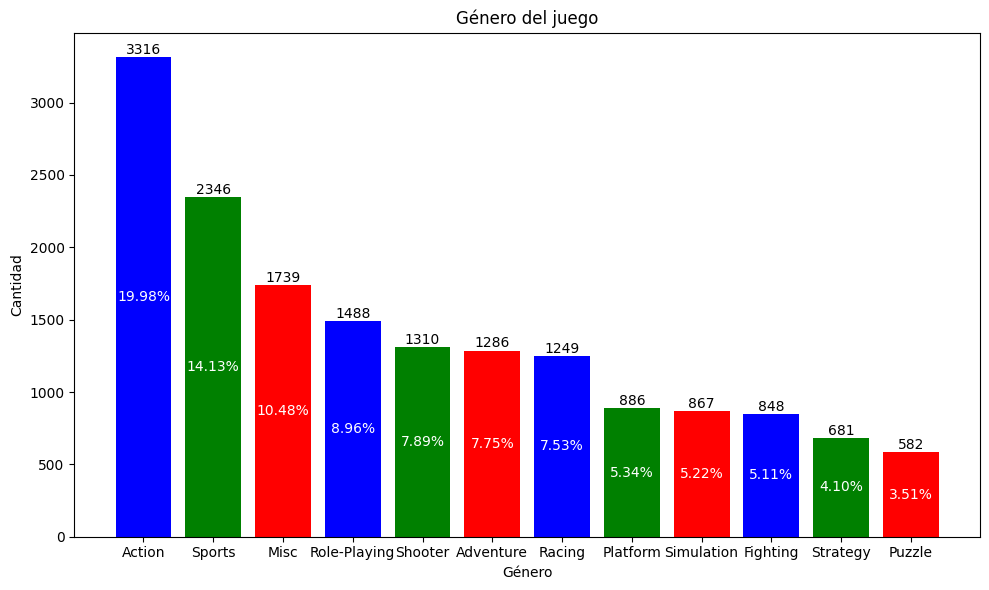

In [ ]:
# Calculando el porcentaje para cada nivel de educación
education_percentage = (Genero / Genero.sum()) * 100

# Creando el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Creando las barras con colores específicos (azul, verde, rojo)
bars = ax.bar(Genero.index, Genero.values, color=['blue', 'green', 'red'])

# Añadiendo el número de datos y el porcentaje en las barras
for idx, bar in enumerate(bars):
    yval = bar.get_height()

    # Agregando el valor numérico en la parte superior de la barra
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom', fontsize=10)

    # Agregando el porcentaje en el centro de la barra con un fondo blanco y texto en blanco
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{education_percentage.iloc[idx]:.2f}%', ha='center', va='center', fontsize=10, color='white')

# Configuración del título y etiquetas de los ejes
ax.set_title('Género del juego')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Género')

# Ajustando el diseño del gráfico
plt.tight_layout()

# Mostrando el gráfico
plt.show()


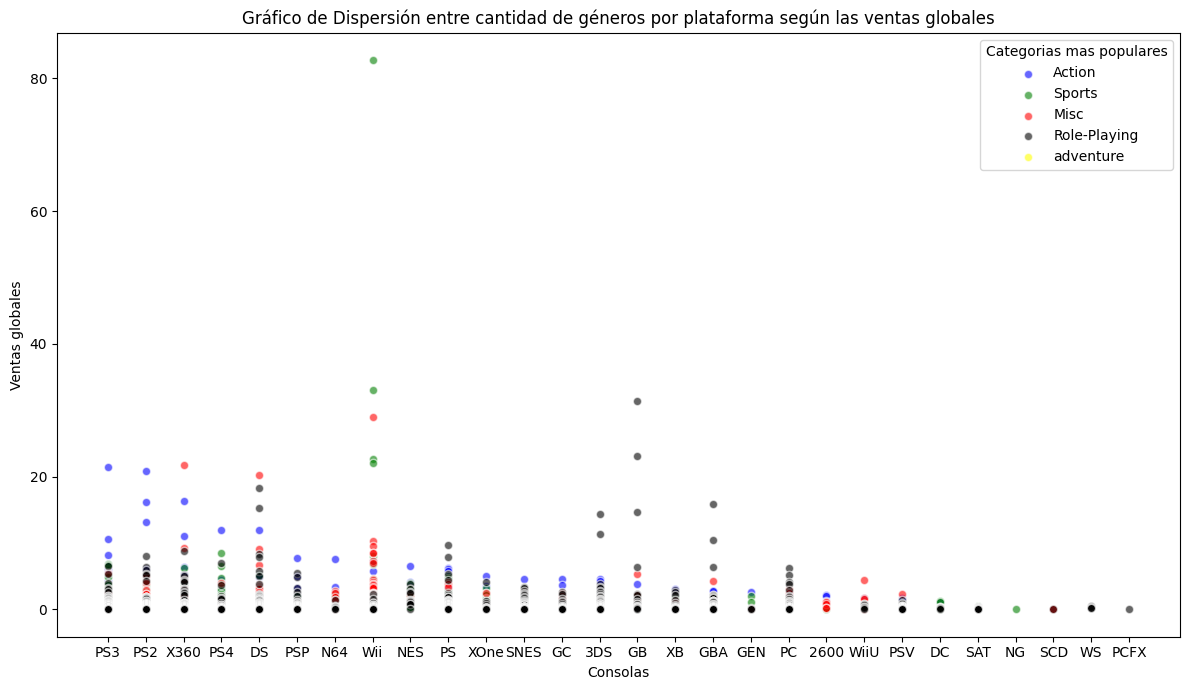

In [ ]:
# Creando el gráfico de dispersión entre salario y el número de empleos, diferenciando por nivel educativo
fig, ax = plt.subplots(figsize=(12, 7))

# Definiendo colores para cada nivel educativo
colors = {'Action': 'blue', 'Sports': 'green', 'Misc': 'red', 'Role-Playing': 'black', 'adventure': 'yellow'}

# Creando el gráfico de dispersión diferenciado por nivel educativo
for education, color in colors.items():
    # Filtrando el DataFrame para un nivel educativo específico
    subset = df[df['Genre'] == education]

    # Dibujando los puntos en el gráfico de dispersión con el color correspondiente
    ax.scatter(subset['Platform'], subset['Global_Sales'], c=color, label=education, alpha=0.6, edgecolors='white')

# Configurando el título y etiquetas de los ejes
ax.set_title('Gráfico de Dispersión entre cantidad de géneros por plataforma según las ventas globales')
ax.set_ylabel('Ventas globales')
ax.set_xlabel('Consolas')

# Agregando una leyenda para diferenciar los puntos por nivel educativo
ax.legend(title='Categorias mas populares')

# Ajustando el diseño del gráfico
plt.tight_layout()

# Mostrando el gráfico
plt.show()


<ipython-input-17-82119573726a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True)


<Axes: >

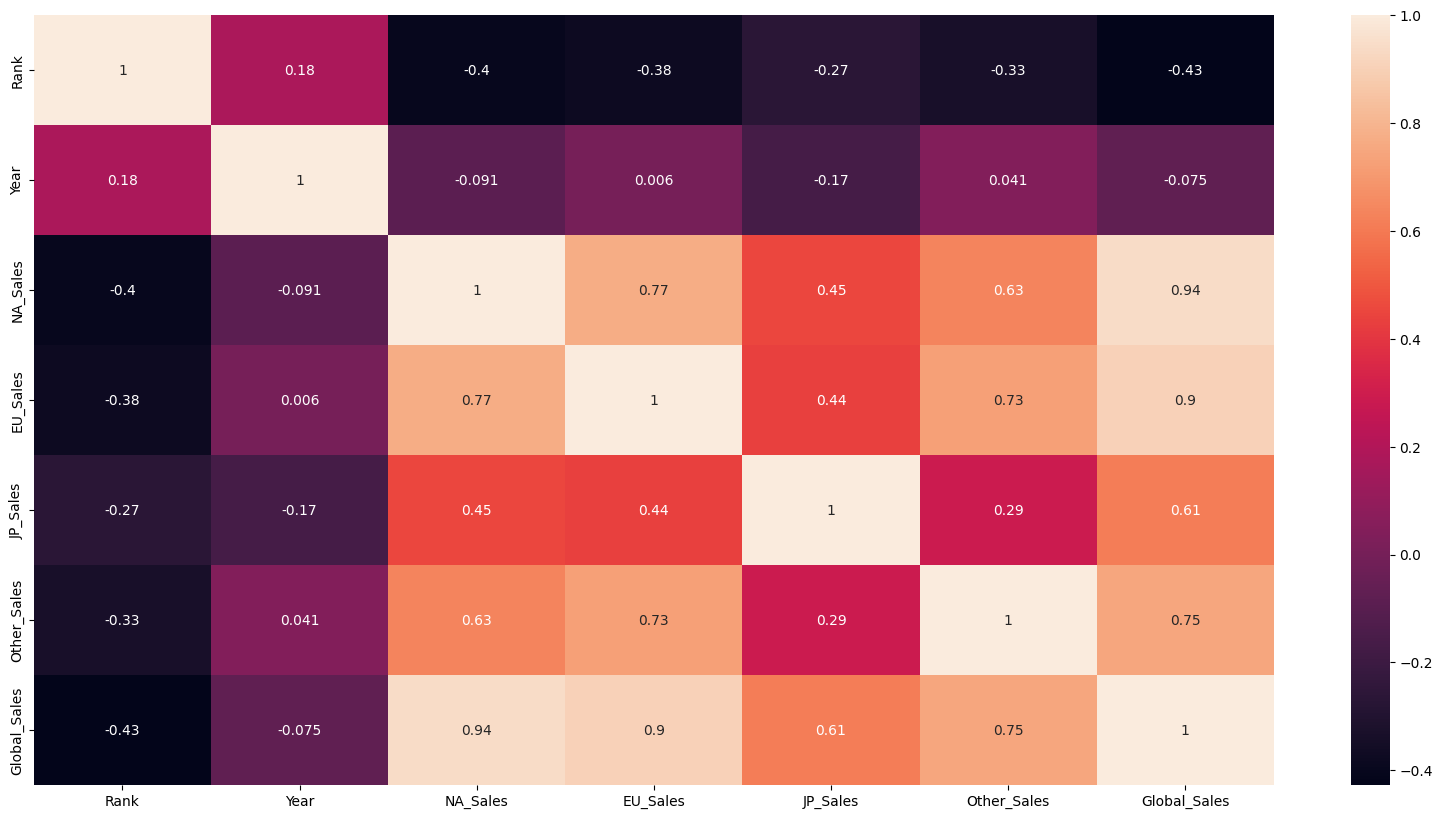

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),  annot=True)

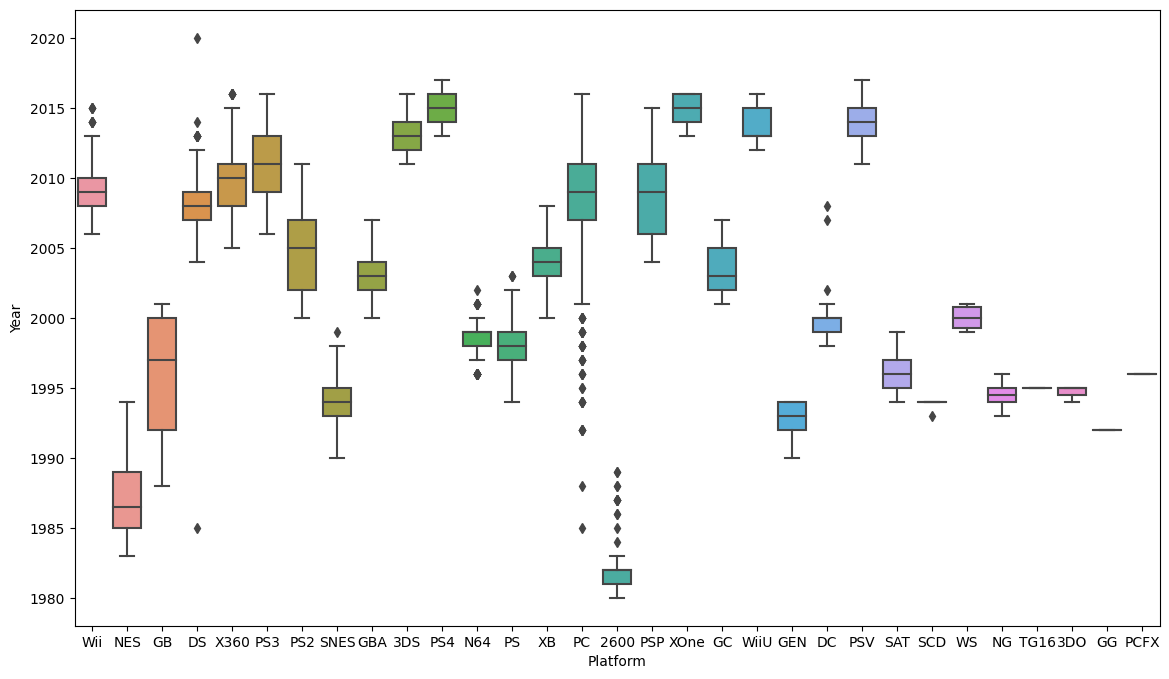

In [ ]:
# Crea una figura más grande
plt.figure(figsize=(14, 8))  # Ajusta el tamaño según tus preferencias

# Crea el gráfico de caja
fig = sns.boxplot(x=df['Platform'], y=df['Year'])

# Muestra la gráfica
plt.show()

In [ ]:
data2= df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Global_Sales']]
data2.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,82.74
1,1985.0,29.08,3.58,6.81,40.24
2,2008.0,15.85,12.88,3.79,35.82
3,2009.0,15.75,11.01,3.28,33.00
4,1996.0,11.27,8.89,10.22,31.37


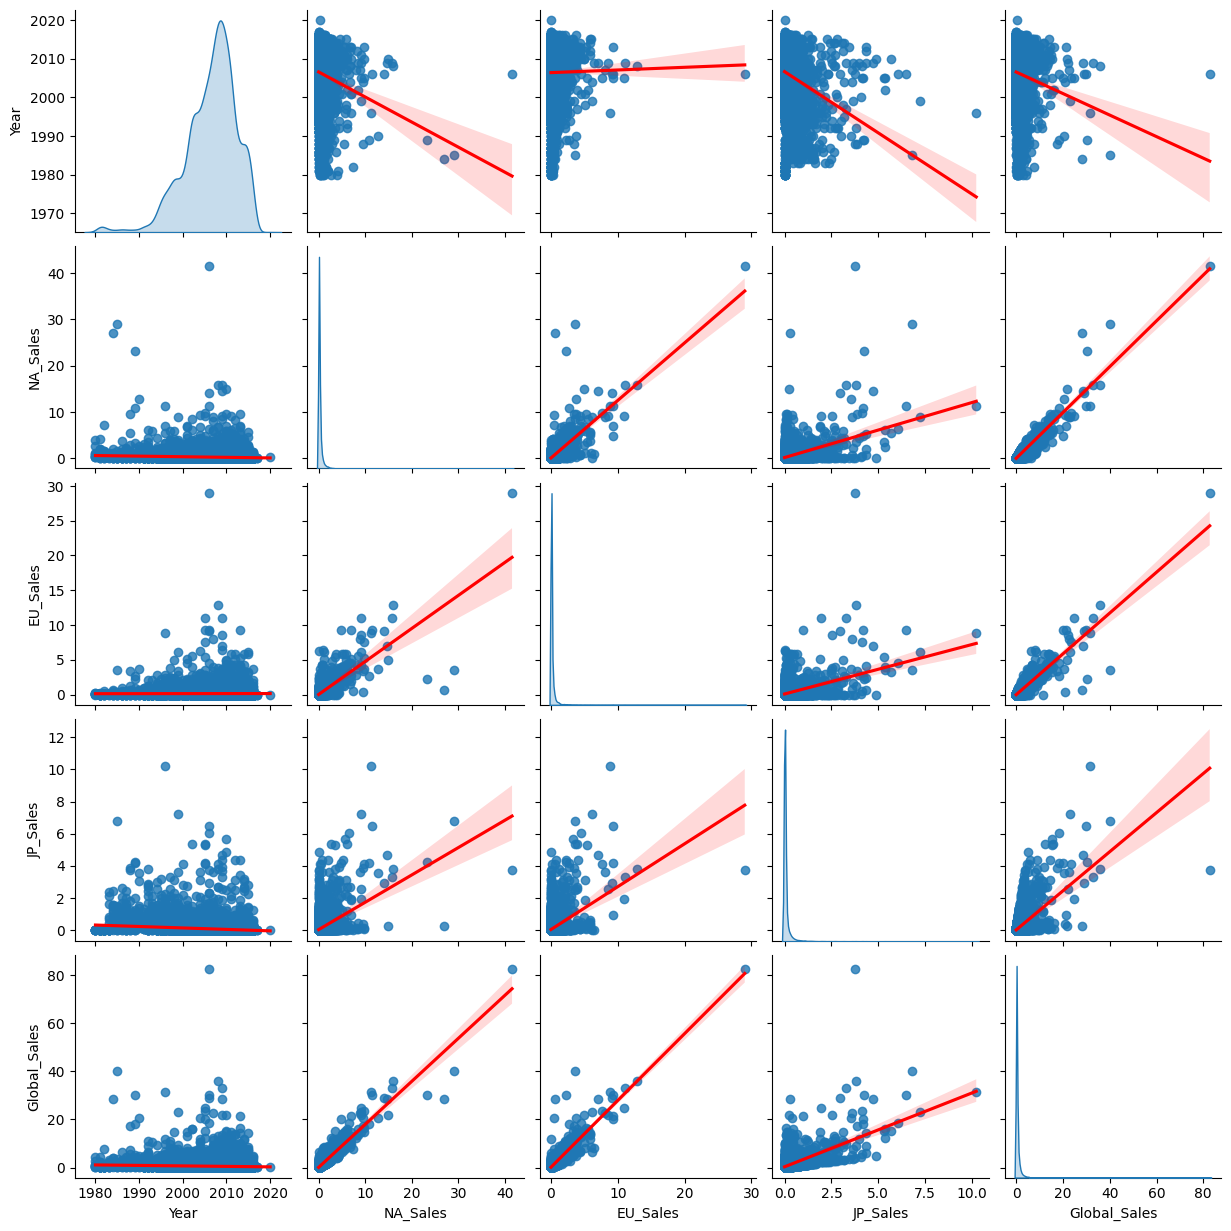

In [ ]:
import seaborn as sns

# Supongamos que tienes un DataFrame llamado data2
sns.pairplot(data2, kind='reg', diag_kind='kde', markers='o', plot_kws={'line_kws':{'color':'red'}})


# Regresion Lineal Simple

In [ ]:
# Estableciendo la regresión lineal simple
reg = smf.ols('Global_Sales ~ NA_Sales', data=df)

# Ajustando el modelo de regresión a los datos
res = reg.fit()


In [ ]:
# Creamos una nueva variable 'y' que almacena la columna 'Global_Sales' del DataFrame 'df'
y = df['Global_Sales']


In [ ]:
# Crear una instancia de LinearRegression
lm = LinearRegression()

# Seleccionar las variables predictoras (X) y la variable de respuesta (y)
X = df[['NA_Sales']]

# Ajustar el modelo de regresión lineal
lm.fit(X, y)

# Realizar predicciones basadas en el modelo
prediccion = lm.predict(X)

# Obtener el término de intercepción (alfa) del modelo
a = lm.intercept_

# Obtener el coeficiente (beta) de la variable predictora
b = lm.coef_


In [ ]:
print('Prediccion')
print('*'*100)
print(prediccion)     # Valores segun la prediccion
print('*'*100)
print(y)              # Valores actuales del consumo
print(lm.score(X,y))  # Retornamos el coeficiente de determinacion en la prediccion

Prediccion
****************************************************************************************************
[7.44061161e+01 5.21695396e+01 2.84636647e+01 ... 6.32023353e-02
 6.32023353e-02 8.11206081e-02]
****************************************************************************************************
0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64
0.8855701283529853


In [ ]:
resultados ={'Real':df['Global_Sales'],'Prediccion':prediccion,'Ventas_Norte_America':df['NA_Sales']}
result = pd.DataFrame(data=resultados)
print(result)

        Real  Prediccion  Ventas_Norte_America
0      82.74   86.962286                 41.49
1      40.24   38.306689                 29.08
2      35.82   35.667618                 15.85
3      33.00   33.024907                 15.75
4      31.37   25.008684                 11.27
...      ...         ...                   ...
16593   0.01    0.046421                  0.01
16594   0.01    0.046421                  0.01
16595   0.01    0.034924                  0.00
16596   0.01    0.048442                  0.00
16597   0.01    0.046421                  0.01

[16598 rows x 3 columns]


In [ ]:
# Agregamos una constante a la variable predictora 'NA_Sales'
X = sm.add_constant(df["NA_Sales"])

# Definimos la variable de respuesta 'Global_Sales'
y = df["Global_Sales"]

# Creamos un modelo de regresión lineal utilizando Ordinary Least Squares (OLS)
model = sm.OLS(y, X)

# Ajustamos el modelo a los datos
results = model.fit()

# Imprimimos un resumen estadístico del modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.284e+05
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:43:32   Log-Likelihood:                -12888.
No. Observations:               16598   AIC:                         2.578e+04
Df Residuals:                   16596   BIC:                         2.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0632      0.004     14.725      0.0

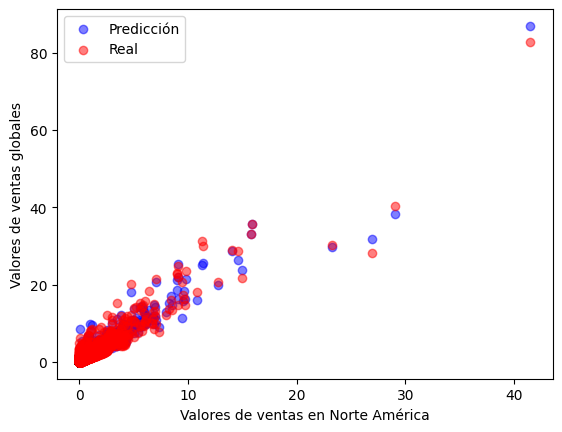

In [ ]:
# Crear un DataFrame 'result' que contiene las ventas reales, predicciones y los valores de ventas en Norte América
resultados = {'Real': df['Global_Sales'], 'Predicción': prediccion, 'Estatus': df['NA_Sales']}
result = pd.DataFrame(data=resultados)

# Crear la gráfica de puntos para las predicciones en azul
plt.scatter(result['Estatus'], result['Predicción'], c='blue', label='Predicción', alpha=0.5)

# Crear la gráfica de puntos para los valores reales en rojo
plt.scatter(result['Estatus'], result['Real'], c='red', label='Real', alpha=0.5)

# Agregar etiquetas a los ejes
plt.xlabel('Valores de ventas en Norte América')
plt.ylabel('Valores de ventas globales')

# Agregar una leyenda para distinguir entre predicciones y valores reales
plt.legend()

# Mostrar la gráfica
plt.show()


# Regresion Lineal Multiple

In [ ]:
# Establecemos la regresión lineal múltiple
reg = smf.ols('Global_Sales ~ NA_Sales + EU_Sales', data=df)

# Ajustamos el modelo de regresión a los datos
res = reg.fit()

In [ ]:
print(res.summary())    # Imprimimos los resultados
print(res.rsquared)
print(res.params)

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.274e+05
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:14   Log-Likelihood:                -3103.8
No. Observations:               16598   AIC:                             6214.
Df Residuals:                   16595   BIC:                             6237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0349      0.002     14.643      0.0

In [ ]:
# Crear una instancia de LinearRegression
lm = LinearRegression()

# Seleccionar las variables predictoras (X) que son 'NA_Sales' y 'EU_Sales'
X = df[['NA_Sales', 'EU_Sales']]

# Ajustar el modelo de regresión lineal múltiple
lm.fit(X, y)

# Realizar predicciones basadas en el modelo
prediccion = lm.predict(X)

# Obtener el término de intercepción (alfa) del modelo
a = lm.intercept_

# Obtener los coeficientes (betas) de las variables predictoras
b = lm.coef_


In [ ]:
print('Prediccion')
print('*'*100)
print(prediccion)     # Valores segun la prediccion
print('*'*100)
print(y)              # Valores actuales del consumo
print(lm.score(X,y))  # Retornamos el coeficiente de determinacion en la prediccion

Prediccion
****************************************************************************************************
[8.69622863e+01 3.83066887e+01 3.56676179e+01 ... 3.49244870e-02
 4.84418331e-02 4.64212388e-02]
****************************************************************************************************
0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64
0.9648033778938531


In [ ]:
resultados = {'Real':df['Global_Sales'],'Prediccion':prediccion}
result = pd.DataFrame(data=resultados)
print(result)

        Real  Prediccion
0      82.74   86.962286
1      40.24   38.306689
2      35.82   35.667618
3      33.00   33.024907
4      31.37   25.008684
...      ...         ...
16593   0.01    0.046421
16594   0.01    0.046421
16595   0.01    0.034924
16596   0.01    0.048442
16597   0.01    0.046421

[16598 rows x 2 columns]


In [ ]:
ECM = metrics.mean_squared_error(df['Global_Sales'],prediccion)
print(ECM)         # Error estandar
r_cuadrado = metrics.r2_score(df['Global_Sales'],prediccion)
print(r_cuadrado)  # R cuandrado o coeficiente de determinacion

0.08510424237664284
0.9648033778938531


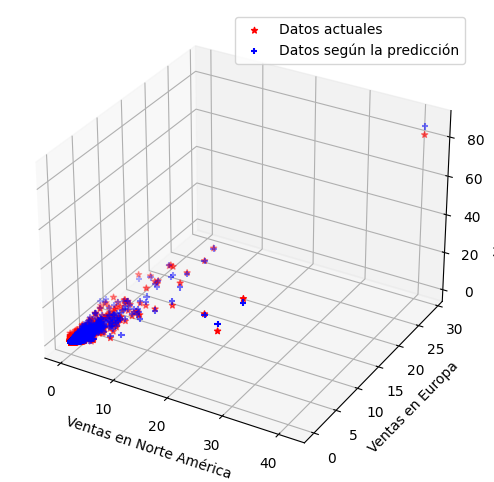

In [ ]:
# Crear una figura tridimensional con ajustes de tamaño
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Definir las variables exógenas
x1 = df['NA_Sales']    # Variable exógena para el eje X1
x2 = df['EU_Sales']    # Variable exógena para el eje X2

# Definir la variable de respuesta
y = df['Global_Sales']  # Variable de respuesta para el eje Y

# Dibujar los puntos de datos actuales en rojo con forma de asterisco
ax.scatter(x1, x2, y, marker='*', c='r', label='Datos actuales')

# Dibujar los puntos de datos según la predicción en azul con forma de cruz
ax.scatter(x1, x2, prediccion, marker='+', c='b', label='Datos según la predicción')

# Configurar etiquetas de los ejes
ax.set_xlabel('Ventas en Norte América')  # Etiqueta del eje X1
ax.set_ylabel('Ventas en Europa')        # Etiqueta del eje X2
ax.set_zlabel('Ventas Globales')         # Etiqueta del eje Y

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico tridimensional
plt.show()
